# Packages and Configurations

In [1]:
import astro_util
import numpy as np
import matplotlib as mpl
from astropy.io import fits
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath, physics, siunitx}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18) 
plt.rc("figure", titlesize=20)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

In [2]:
data = fits.open("data/stars.fits")[0].data

# Star Centers

In [3]:
reference_center = astro_util.find_center_of_mass(data[770:806, 410:446])
reference_center = (reference_center[0] + 410, reference_center[1] + 770)

In [4]:
star1_center = astro_util.find_center_of_mass(data[925:946, 1470:1491])
star1_center = (star1_center[0] + 1470, star1_center[1] + 925)

star2_center = astro_util.find_center_of_mass(data[1285:1306, 1230:1251])
star2_center = (star2_center[0] + 1230, star2_center[1] + 1285)

stars_pixel_distance = np.sqrt(
    (star1_center[0] - star2_center[0])**2
    + (star1_center[1] - star2_center[1])**2)
stars_arcsec_distance = 6 * 60 + 24

arcsec_per_pixel = stars_arcsec_distance / stars_pixel_distance
arcsec_per_pixel_error = 0.5 / stars_pixel_distance * np.sqrt(
    1 + 2 * arcsec_per_pixel**2)
arcsec_squared_per_pixel = arcsec_per_pixel**2
arcsec_squared_per_pixel_error = 2 * arcsec_per_pixel * arcsec_per_pixel_error

print(f"Arc seconds per pixel: {arcsec_per_pixel}")
print(f"Arc seconds per pixel error: {arcsec_per_pixel_error}")

Arc seconds per pixel: 0.8856995468897157
Arc seconds per pixel error: 0.0018484219443384374


In [5]:
arcsec_per_pixel = 0.887

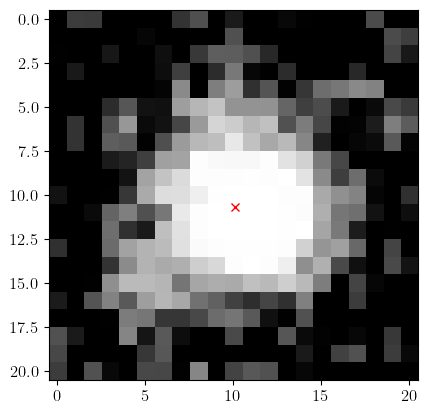

In [6]:
fig, ax = plt.subplots()
ax.imshow(data[925:946, 1470:1491], cmap="gray")
center = astro_util.find_center_of_mass(data[925:946, 1470:1491])
ax.plot(center[0], center[1], "rx")
plt.show()

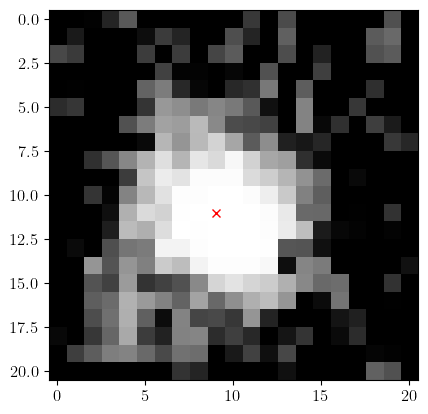

In [7]:
fig, ax = plt.subplots()
ax.imshow(data[1285:1306, 1230:1251], cmap="gray")
center = astro_util.find_center_of_mass(data[1285:1306, 1230:1251])
ax.plot(center[0], center[1], "rx")
plt.show()

# Empty Areas

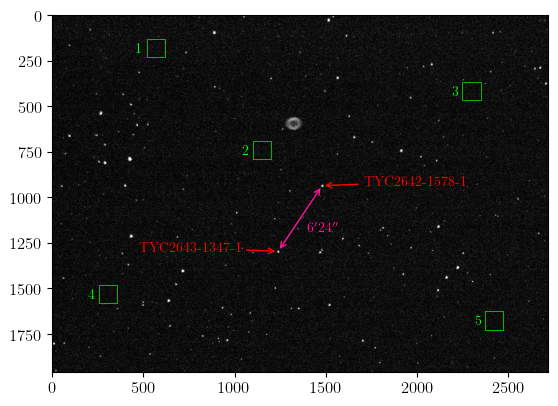

In [8]:
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')

ax.annotate("TYC2642-1578-1", (star1_center[0], star1_center[1]),
            (30, 0), textcoords="offset points", color="red",
            arrowprops=dict(arrowstyle="->", color="red"))
ax.annotate("TYC2643-1347-1", (star2_center[0], star2_center[1]),
            (-100, 0), textcoords="offset points", color="red",
            arrowprops=dict(arrowstyle="->", color="red"))
ax.annotate('', (star1_center[0], star1_center[1]),
            (star2_center[0], star2_center[1]),
            arrowprops=dict(arrowstyle="<->", color="deeppink"))
ax.text((star1_center[0] + star2_center[0]) / 2 + 40,
    (star1_center[1] + star2_center[1]) / 2 + 70,
    r"$\ang{;6;24}$", color="deeppink")

ax.add_patch(mpl.patches.Rectangle(
    (520, 130), 100, 100, lw=0.5, color="lime", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (1100, 690), 100, 100, lw=0.5, color="lime", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (2250, 365), 100, 100, lw=0.5, color="lime", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (255, 1480), 100, 100, lw=0.5, color="lime", fill=False, clip_on=False))
ax.add_patch(mpl.patches.Rectangle(
    (2375, 1625), 100, 100, lw=0.5, color="lime", fill=False, clip_on=False))

ax.text(480, 185, "1", color="lime", va="center", ha="center", clip_on=False)
ax.text(1060, 745, "2", color="lime", va="center", ha="center", clip_on=False)
ax.text(2210, 420, "3", color="lime", va="center", ha="center", clip_on=False)
ax.text(215, 1535, "4", color="lime", va="center", ha="center", clip_on=False)
ax.text(2335, 1680, "5", color="lime", va="center", ha="center", clip_on=False)

plt.savefig("markings.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [9]:
reference_photometry = astro_util.get_aperture_photometry_magnitude(
    data, reference_center)
area1mag = (8.88
    - 2.5 * np.log(np.mean(data[130:231, 520:621])
                   / data.max() / arcsec_squared_per_pixel)
    - reference_photometry[0])
area2mag = (8.88
    - 2.5 * np.log(np.mean(data[690:791, 1100:1201])
                   / data.max() / arcsec_squared_per_pixel)
    - reference_photometry[0])
area3mag = (8.88
    - 2.5 * np.log(np.mean(data[365:466, 2250:2351])
                   / data.max() / arcsec_squared_per_pixel)
    - reference_photometry[0])
area4mag = (8.88
    - 2.5 * np.log(np.mean(data[1480:1581, 255:356])
                   / data.max() / arcsec_squared_per_pixel)
    - reference_photometry[0])
area5mag = (8.88
    - 2.5 * np.log(np.mean(data[1625:1726, 2335:2436])
                   / data.max() / arcsec_squared_per_pixel)
    - reference_photometry[0])

print('Area 1 magnitude: ', area1mag)
print('Area 2 magnitude: ', area2mag)
print('Area 3 magnitude: ', area3mag)
print('Area 4 magnitude: ', area4mag)
print('Area 5 magnitude: ', area5mag)

Area 1 magnitude:  21.722918029116435
Area 2 magnitude:  21.804048926539902
Area 3 magnitude:  21.71085417884407
Area 4 magnitude:  22.034644754914595
Area 5 magnitude:  21.815263380980607


In [10]:
print(np.mean([area1mag, area2mag, area3mag, area4mag, area5mag]))
print(np.std([area1mag, area2mag, area3mag, area4mag, area5mag]))

21.81754585407912
0.11632441558163585
